Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
 Dataset cargado y preparado
 Datos filtrados para CORUNA: 276 registros válidos
 Precios normalizados (Min-Max)
 Precios discretizados en categorías

 Estadísticas Descriptivas:
       Precio_gasolina_95  Precio_gasoleo_A
count      276.000000         276.000000   
mean         1.533130           1.485880   
std          0.078061           0.102531   
min          1.339000           1.219000   
25%          1.506500           1.449000   
50%          1.559000           1.529000   
75%          1.579000           1.559000   
max          1.659000           1.599000   

 Medidas de Dispersión:

Precio_gasolina_95:
• Rango: 0.32 €
• Varianza: 0.0061
• Desviación Estándar: 0.0781

Precio_ga

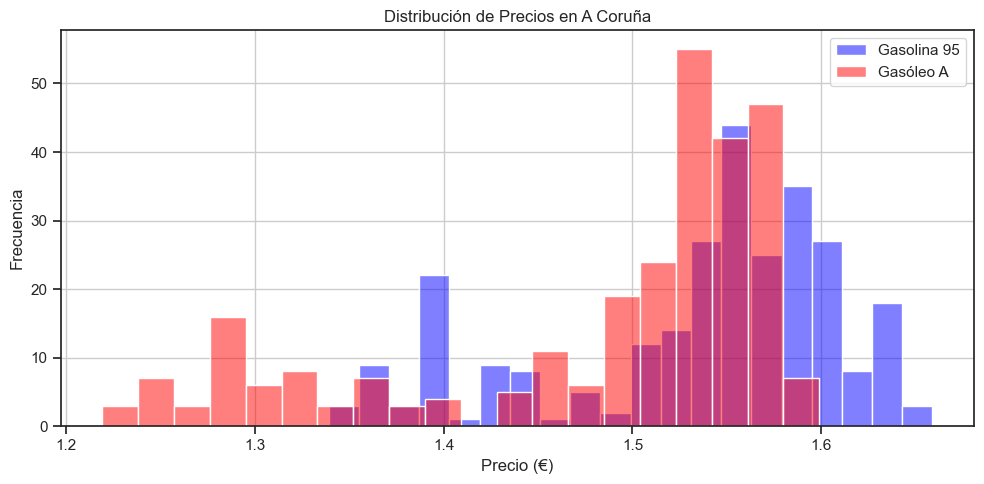

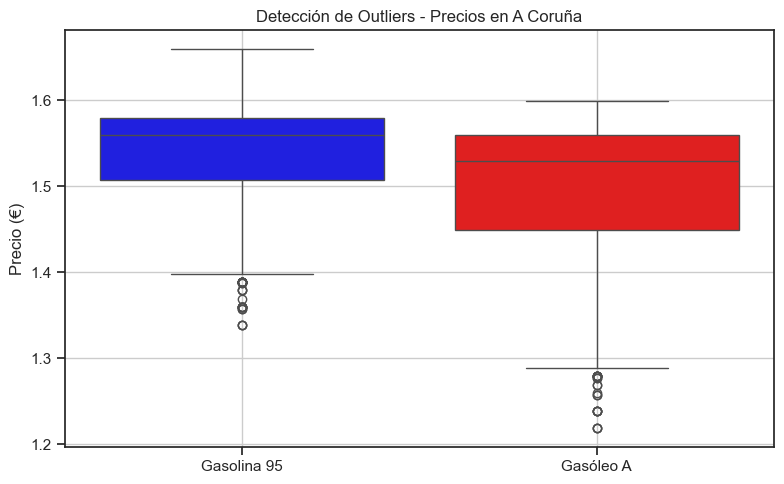

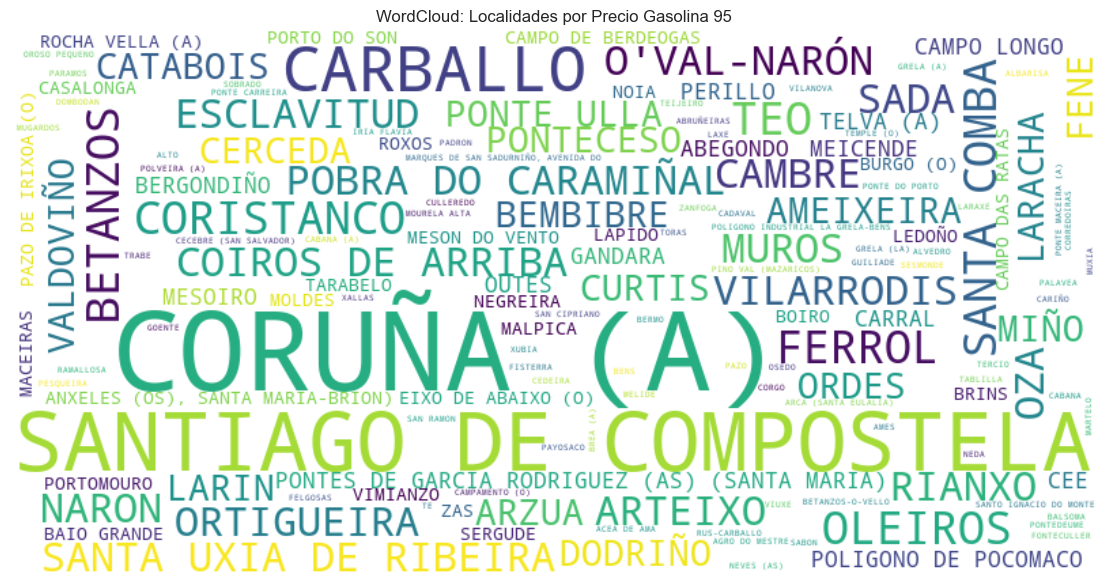

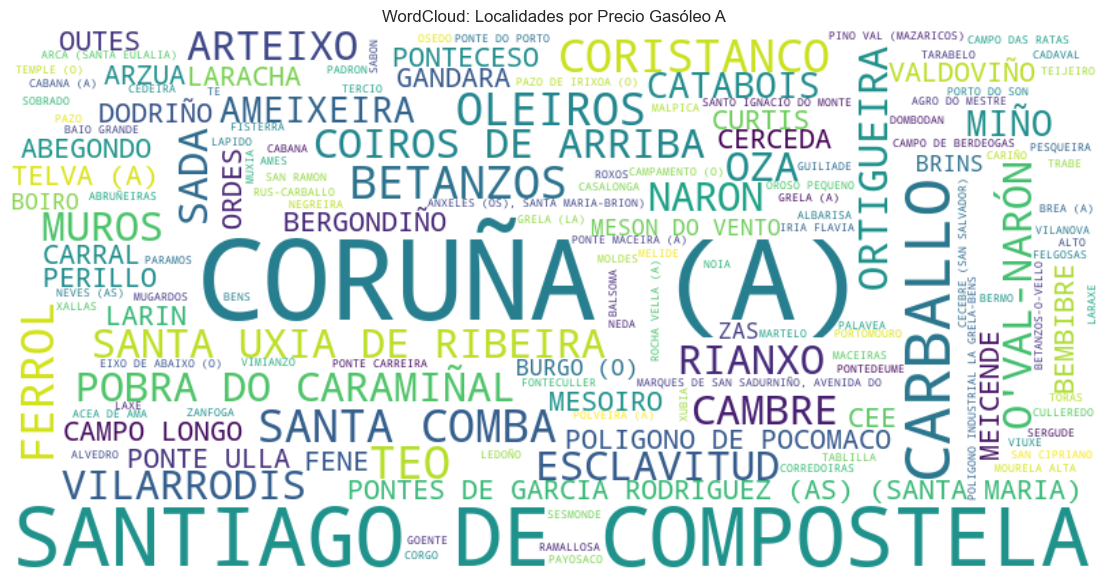

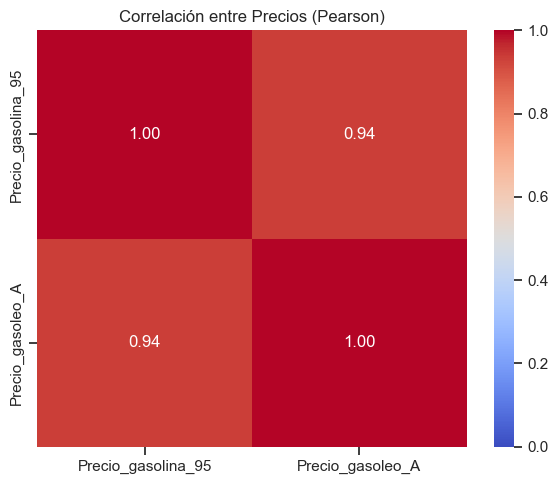


-----Ejecutando AutoViz -----
Shape of your Data Set loaded: (276, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    10 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Provincia']
To fix these data qualit

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Provincia,object,0.000000,0,,,Possible Zero-variance or low information colum: drop before modeling step.
Municipio,object,0.000000,29,,,48 rare categories: Too many to list. Group them into a single category or drop the categories.
Localidad,object,0.000000,57,,,Possible high cardinality column with 154 unique values: Use hash encoding or text embedding to reduce dimension.
Codigo_postal,int64,0.000000,52,15002.000000,15985.000000,No issue
Direccion,object,0.000000,100,,,No issue
Precio_gasolina_95,float64,0.000000,NA,1.339000,1.659000,Column has 15 outliers greater than upper bound (1.70) or lower than lower bound(1.39). Cap them or remove them.
Precio_gasoleo_A,float64,0.000000,NA,1.219000,1.599000,"Column has 22 outliers greater than upper bound (1.72) or lower than lower bound(1.28). Cap them or remove them., Column has a high correlation with ['Precio_gasolina_95']. Consider dropping one of them."
Tipo_venta,object,0.000000,0,,,No issue
Tipo_servicio,object,13.333333,1,,,"36 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
Rotulo,object,0.000000,34,,,80 rare categories: Too many to list. Group them into a single category or drop the categories.


Number of All Scatter Plots = 3


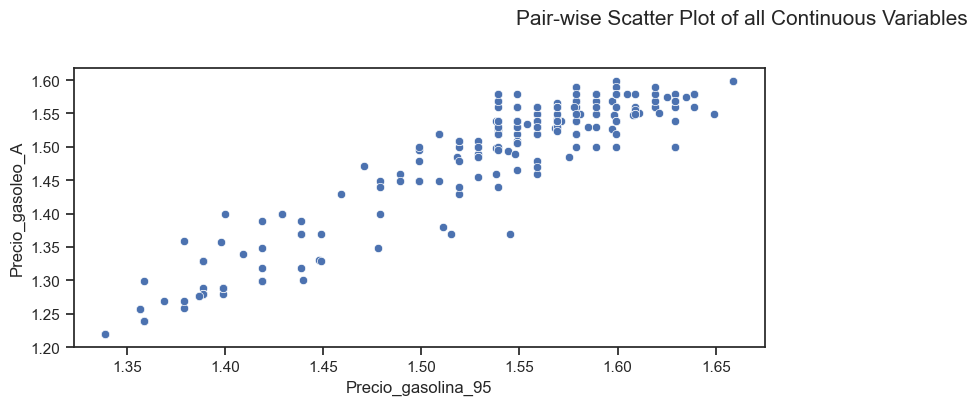

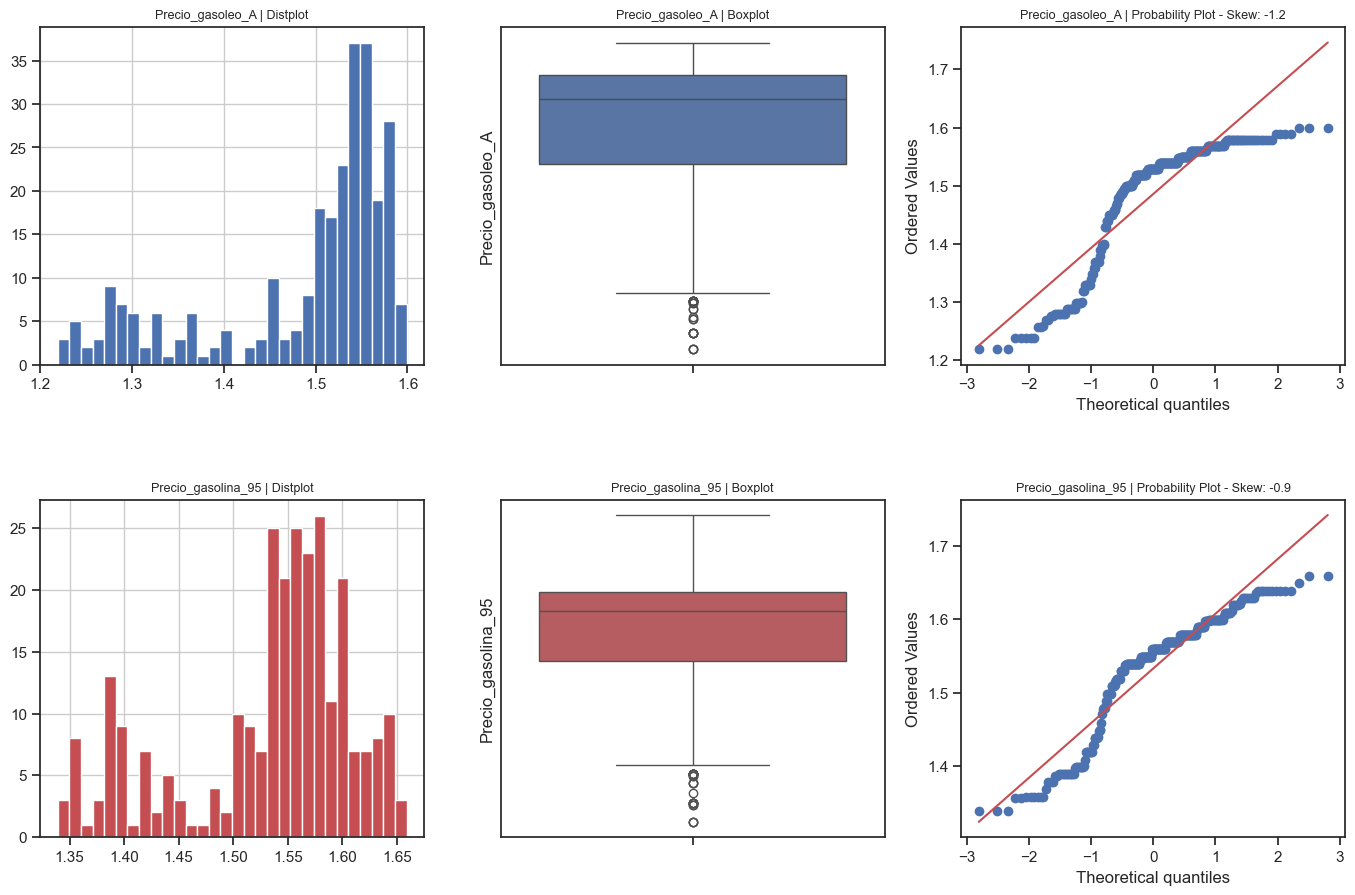

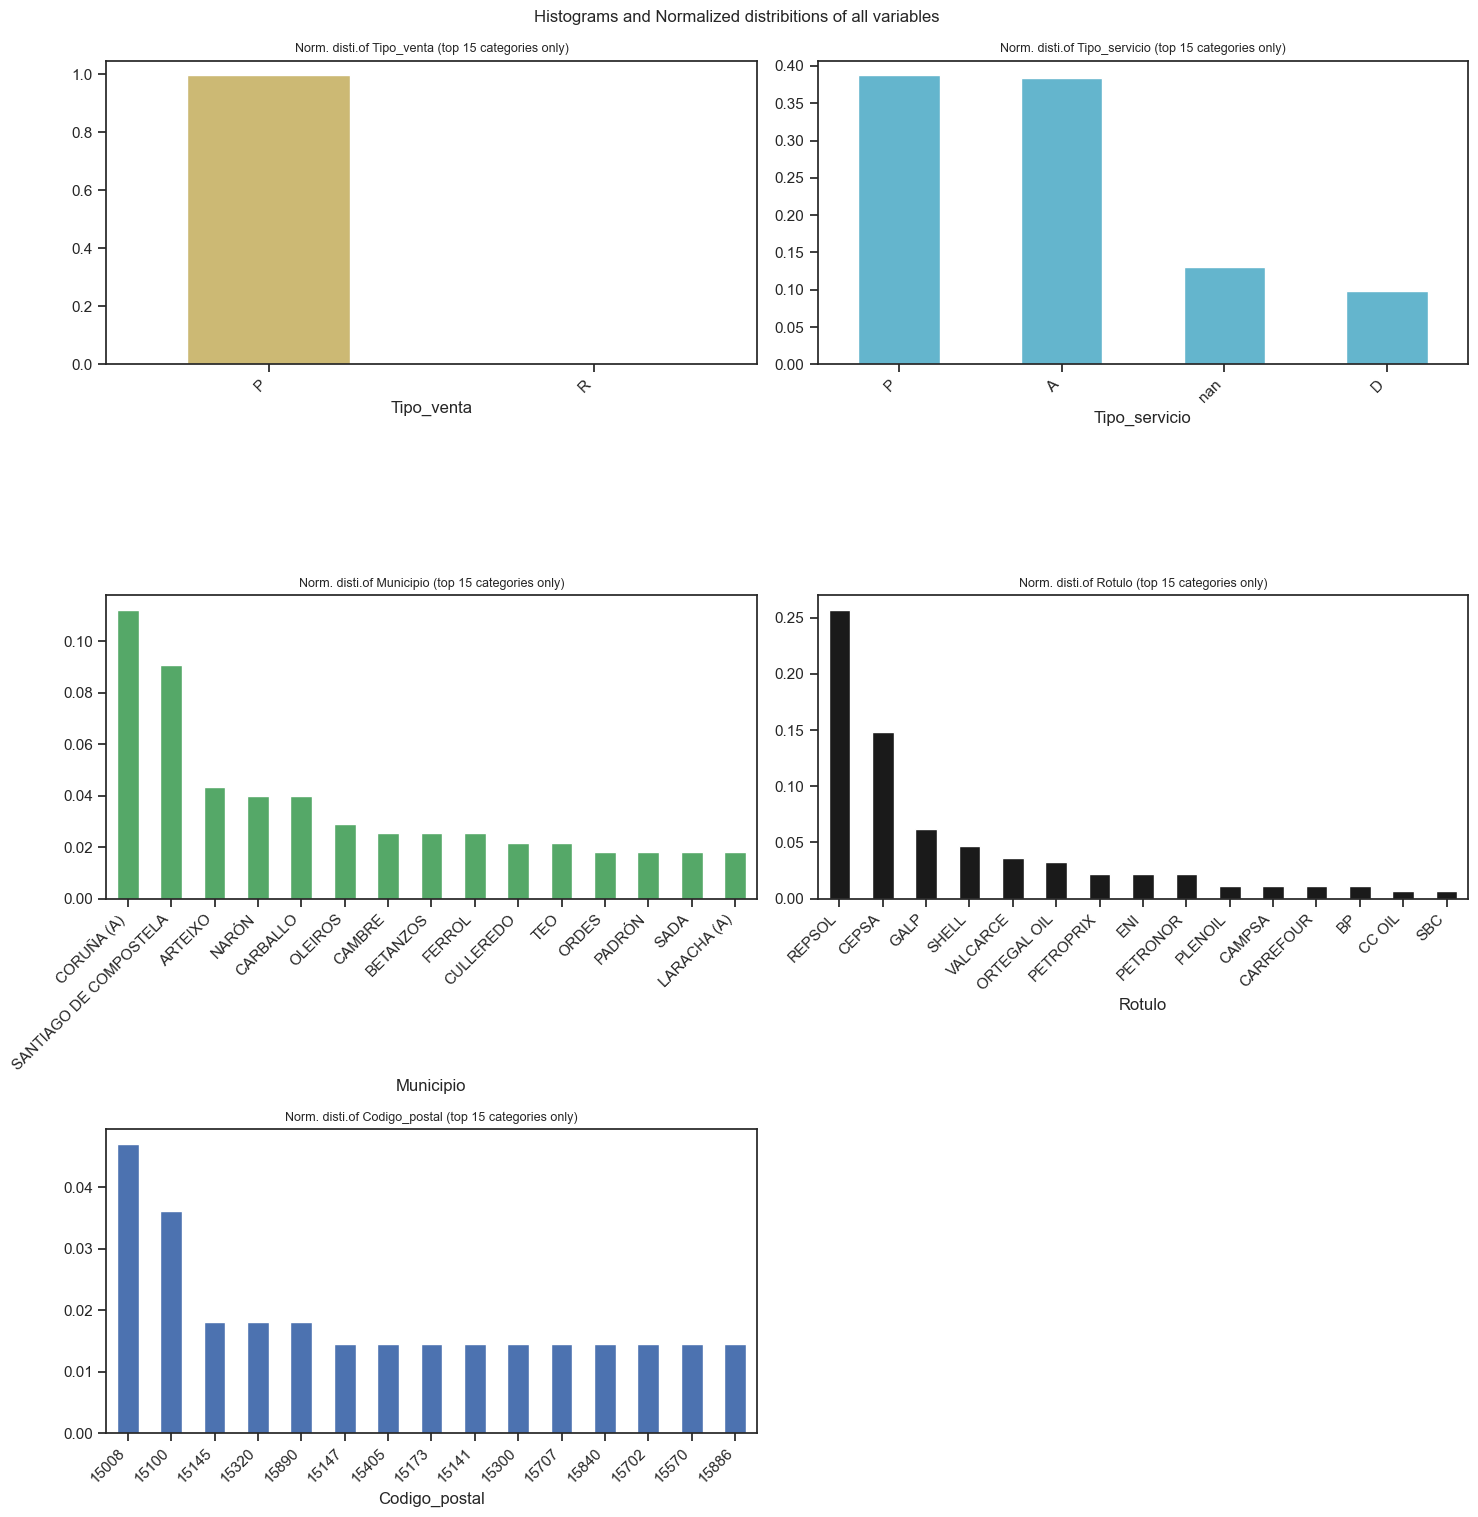

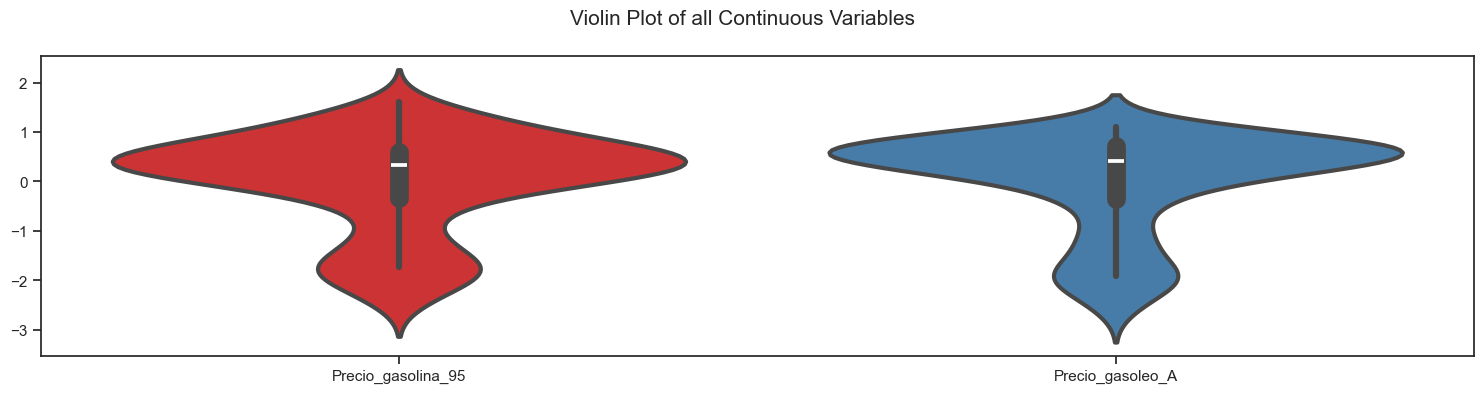

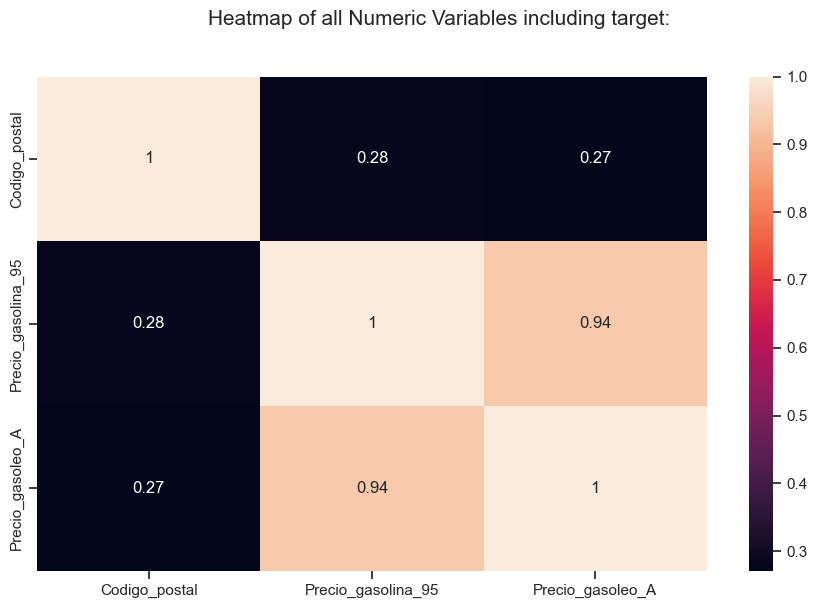

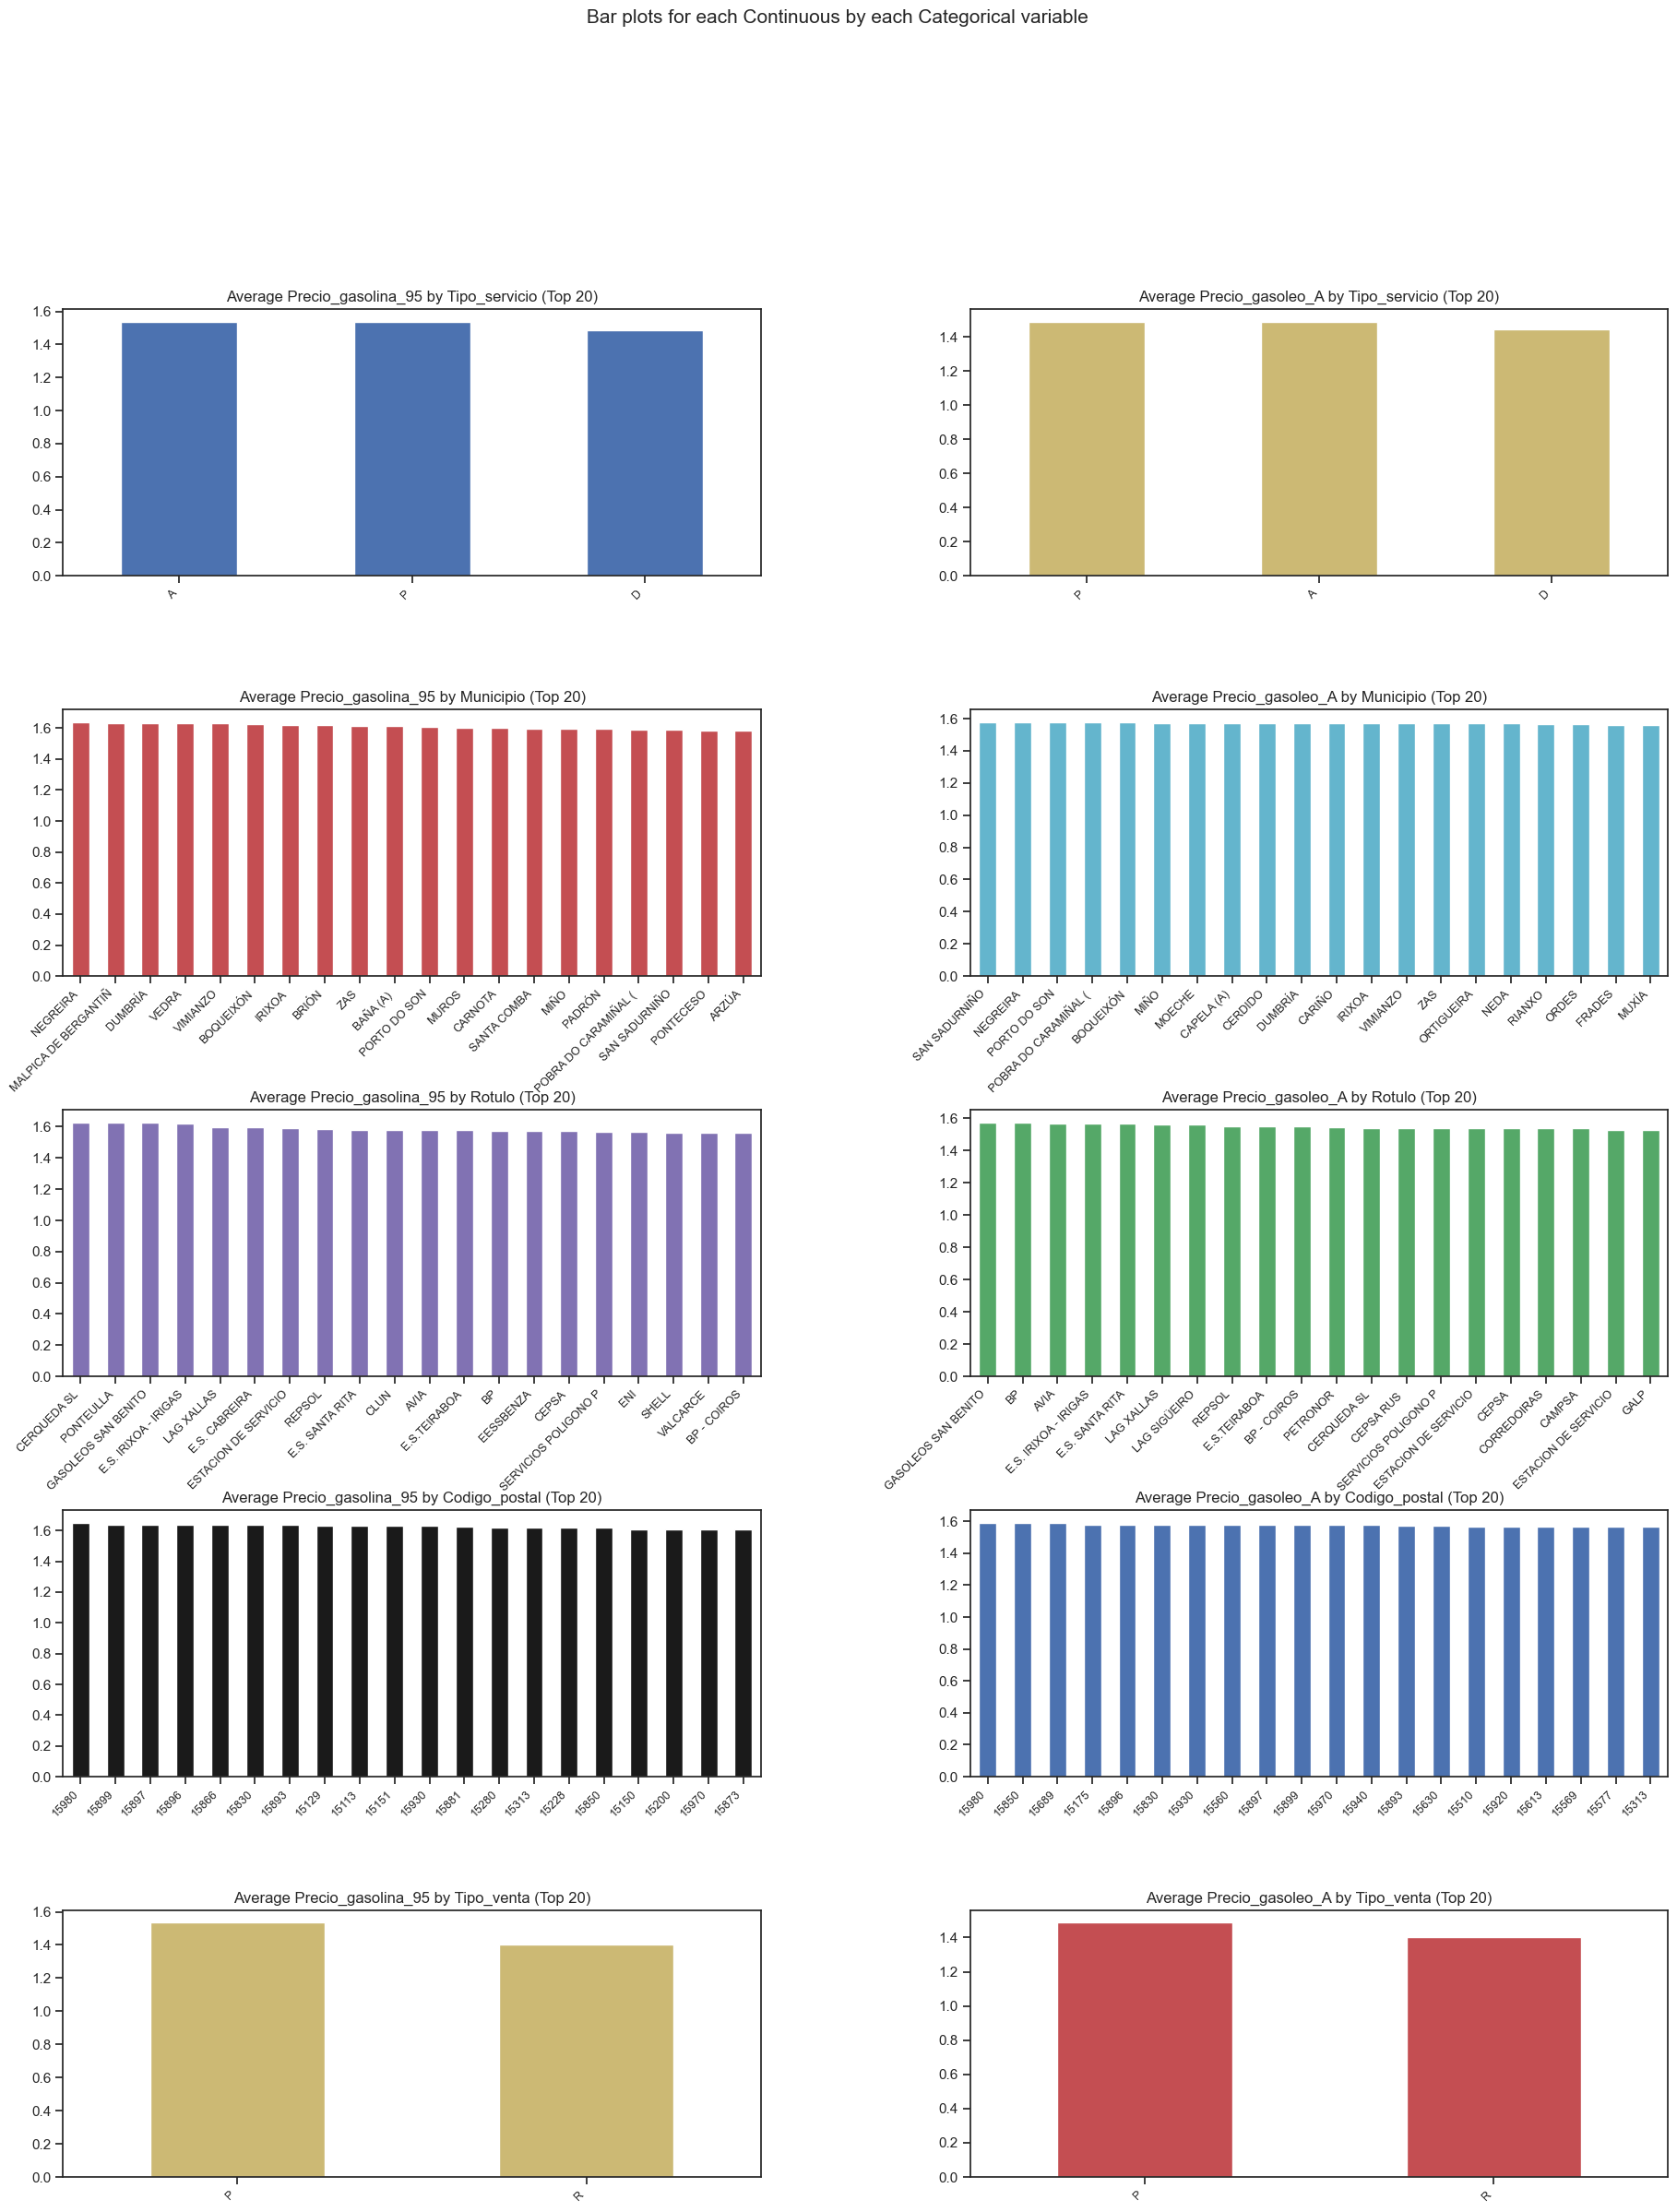

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

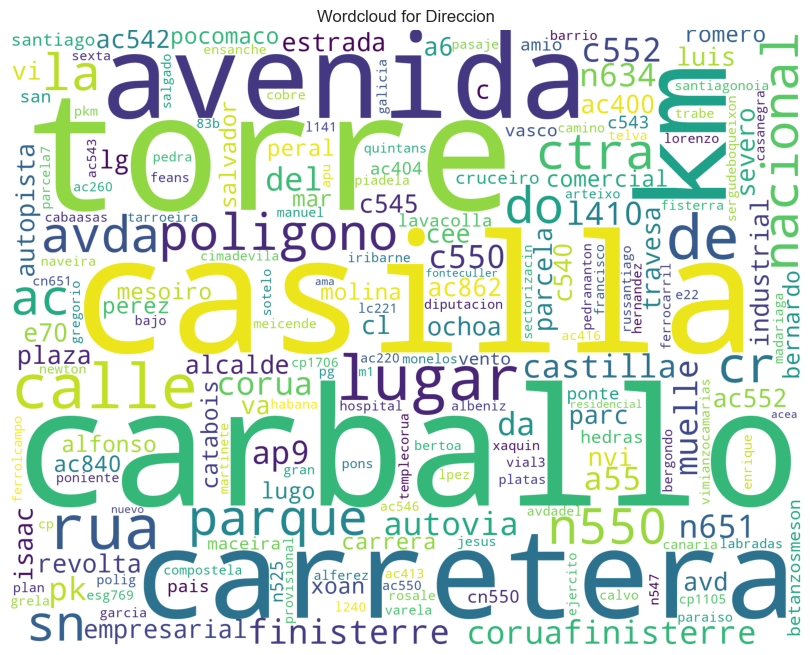

In [ ]:
# ---------------------------------------------
# Actividad: Num 1 Creada : Carlos Galvez
# Análisis Exploratorio de Datos (EDA) - A CORUÑA
# Dataset: gii32_act1_precios_carburantes_24.csv
# ---------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from autoviz.AutoViz_Class import AutoViz_Class
import unicodedata
import re

%matplotlib inline

# ---------------------------------------------
# 1. Funciones de limpieza y preparación
# ---------------------------------------------

def normalizar_texto(texto):
    """Normaliza texto eliminando acentos y caracteres especiales"""
    if not isinstance(texto, str):
        return ""
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
    texto = re.sub(r'\(.*?\)', '', texto).strip().upper()
    return texto

def cargar_datos(ruta_csv):
    """Carga y prepara el dataset inicial"""
    df = pd.read_csv(ruta_csv, encoding='utf-8')
    df.columns = [
        "Provincia", "Municipio", "Localidad", "Codigo_postal", "Direccion",
        "Precio_gasolina_95", "Precio_gasoleo_A", "Tipo_venta", "Tipo_servicio", "Rotulo"
    ]
    df["Provincia"] = df["Provincia"].apply(normalizar_texto)
    print(" Dataset cargado y preparado")
    return df

def filtrar_limpiar_datos(df, provincia="CORUÑA"):
    """Filtra por provincia y limpia los precios"""
    provincia_norm = normalizar_texto(provincia)
    df_filtrado = df[df["Provincia"] == provincia_norm].copy()
    
    # Limpieza de precios
    for col in ["Precio_gasolina_95", "Precio_gasoleo_A"]:
        df_filtrado[col] = (
            df_filtrado[col].astype(str)
            .str.replace(",", ".")
            .str.extract(r"(\d+\.\d+)", expand=False)
            .astype(float)
        )
    
    df_filtrado = df_filtrado.dropna(subset=["Precio_gasolina_95", "Precio_gasoleo_A"])
    print(f" Datos filtrados para {provincia_norm}: {len(df_filtrado)} registros válidos")
    return df_filtrado

# ---------------------------------------------
# 2. Transformaciones de datos
# ---------------------------------------------

def normalizar_datos(df):
    """Aplica normalización Min-Max a los precios"""
    scaler = MinMaxScaler()
    df[["Precio_gasolina_95_norm", "Precio_gasoleo_A_norm"]] = (
        scaler.fit_transform(df[["Precio_gasolina_95", "Precio_gasoleo_A"]])
    )
    print(" Precios normalizados (Min-Max)")
    return df

def discretizar_precios(df, bins=[0, 1.45, 1.55, 1.70], labels=["bajo", "medio", "alto"]):
    """Discretiza los precios en categorías"""
    df["Categoria_gasolina"] = pd.cut(
        df["Precio_gasolina_95"],
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    df["Categoria_gasoleo"] = pd.cut(
        df["Precio_gasoleo_A"],
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    print(" Precios discretizados en categorías")
    return df

# ---------------------------------------------
# 3. Visualizaciones
# ---------------------------------------------

def generar_histograma(df):
    """Muestra histograma comparativo de precios"""
    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=df,
        x="Precio_gasolina_95",
        bins=20,
        color="blue",
        alpha=0.5,
        label="Gasolina 95"
    )
    sns.histplot(
        data=df,
        x="Precio_gasoleo_A",
        bins=20,
        color="red",
        alpha=0.5,
        label="Gasóleo A"
    )
    plt.title("Distribución de Precios en A Coruña")
    plt.xlabel("Precio (€)")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def generar_boxplot(df):
    """Genera boxplot para detección de outliers"""
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=df[["Precio_gasolina_95", "Precio_gasoleo_A"]],
        palette=["blue", "red"]
    )
    plt.title("Detección de Outliers - Precios en A Coruña")
    plt.ylabel("Precio (€)")
    plt.xticks([0, 1], ["Gasolina 95", "Gasóleo A"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def generar_wordcloud(df, columna_precio, titulo):
    """Genera nube de palabras ponderada por precios"""
    freq = df.groupby("Localidad")[columna_precio].sum().to_dict()
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate_from_frequencies(freq)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

def generar_heatmap_correlacion(df):
    """Muestra matriz de correlación entre precios"""
    plt.figure(figsize=(6, 5))
    corr = df[["Precio_gasolina_95", "Precio_gasoleo_A"]].corr(method='pearson')
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=0, vmax=1)
    plt.title("Correlación entre Precios (Pearson)")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------
# 4. Análisis Automático (AutoViz)
# ---------------------------------------------

def ejecutar_autoviz(df):
    """Ejecuta análisis automático con AutoViz desde un DataFrame ya procesado"""
    print("\n-----Ejecutando AutoViz -----")
    AV = AutoViz_Class()
    dft = AV.AutoViz(
        filename="",        
        dfte=df,            
        depVar="",          
        sep=",",
        header=0,
        verbose=1,
        lowess=False,
        chart_format='svg',  # Cambiar a 'png' si hay problemas en el entorno
        max_rows_analyzed=150000,
        max_cols_analyzed=30
    )



# ---------------------------------------------
# 5. Análisis estadístico
# ---------------------------------------------

def mostrar_estadisticas(df):
    """Muestra estadísticas descriptivas clave"""
    print("\n Estadísticas Descriptivas:")
    print(df[["Precio_gasolina_95", "Precio_gasoleo_A"]].describe())
    
    print("\n Medidas de Dispersión:")
    for col in ["Precio_gasolina_95", "Precio_gasoleo_A"]:
        print(f"\n{col}:")
        print(f"• Rango: {df[col].max() - df[col].min():.2f} €")
        print(f"• Varianza: {df[col].var():.4f}")
        print(f"• Desviación Estándar: {df[col].std():.4f}")

# ---------------------------------------------
# 6. Función principal
# ---------------------------------------------

def ejecutar_analisis_completo():
    """Flujo completo del análisis EDA"""
    # 1. Carga y preparación inicial
    ruta_csv = "gii32_act1_precios_carburantes_24.csv"
    df = cargar_datos(ruta_csv)
    
    # 2. Filtrado y limpieza
    df_coruna = filtrar_limpiar_datos(df, provincia="CORUÑA")
    
    if df_coruna.empty:
        print(" No hay datos disponibles para A Coruña")
        return
    
    # 3. Transformaciones
    df_normalizado = normalizar_datos(df_coruna.copy())
    df_discretizado = discretizar_precios(df_coruna.copy())
    
    # 4. Análisis estadístico
    mostrar_estadisticas(df_coruna)
    
    # 5. Visualizaciones
    generar_histograma(df_coruna)
    generar_boxplot(df_coruna)
    generar_wordcloud(df_coruna, "Precio_gasolina_95", "WordCloud: Localidades por Precio Gasolina 95")
    generar_wordcloud(df_coruna, "Precio_gasoleo_A", "WordCloud: Localidades por Precio Gasóleo A")
    generar_heatmap_correlacion(df_coruna)
    
    # 6. AutoViz
    ejecutar_autoviz(df_coruna)

# ---------------------------------------------
# Ejecución del análisis
# ---------------------------------------------
if __name__ == "__main__":
    ejecutar_analisis_completo()